In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('final_df_csv/final_df.csv')

In [4]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,merch_lat,merch_long,is_fraud,merch_zipcode,merch_eff_time,merch_last_update_time,cc_bic
0,0,2019-01-01 08:00:18.000000 +08:00,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,28705.0,2012-01-01 08:00:18.798532 +08:00,2012-01-01 08:00:18.666000 +08:00,CITIUS33CHI
1,1,2019-01-01 08:00:44.000000 +08:00,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,NaN,2012-01-01 08:00:44.867960 +08:00,1974-03-15 07:30:04.479000 +08:00,ADMDUS41


In [5]:
len(df)

1296675

In [6]:
df["full_name"] = df["first"] + " " + df["last"]
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,merch_lat,merch_long,is_fraud,merch_zipcode,merch_eff_time,merch_last_update_time,cc_bic,full_name
0,0,2019-01-01 08:00:18.000000 +08:00,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,28705.0,2012-01-01 08:00:18.798532 +08:00,2012-01-01 08:00:18.666000 +08:00,CITIUS33CHI,Jennifer Banks
1,1,2019-01-01 08:00:44.000000 +08:00,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,NaN,2012-01-01 08:00:44.867960 +08:00,1974-03-15 07:30:04.479000 +08:00,ADMDUS41,Stephanie Gill


In [7]:
df['trans_date_trans_time'].min(), df['trans_date_trans_time'].max()

('2019-01-01 08:00:18.000000 +08:00', '2020-06-21 20:13:37.000000 +08:00')

In [8]:
# Set transaction datetime as index for easier filtering
df.set_index("trans_date_trans_time", inplace=True)

# Filter time range (assuming 2-year data available)
# Ensure end_date is a datetime
end_date = pd.to_datetime(df.index.max())

df.head(2)

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,merch_lat,merch_long,is_fraud,merch_zipcode,merch_eff_time,merch_last_update_time,cc_bic,full_name
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 08:00:18.000000 +08:00,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,28705.0,2012-01-01 08:00:18.798532 +08:00,2012-01-01 08:00:18.666000 +08:00,CITIUS33CHI,Jennifer Banks
2019-01-01 08:00:44.000000 +08:00,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,NaN,2012-01-01 08:00:44.867960 +08:00,1974-03-15 07:30:04.479000 +08:00,ADMDUS41,Stephanie Gill


In [9]:
end_date

Timestamp('2020-06-21 20:13:37+0800', tz='UTC+08:00')

In [10]:
df.index = pd.to_datetime(df.index)

# Group by full name
group = df.groupby("full_name")

# Total spending
total_spending = group["amt"].sum().rename("total_spending")

# Count of transactions
txn_count = group["amt"].count().rename("txn_count")

# Last 12 and last 3 months windows
start_12m = end_date - pd.DateOffset(months=12)
start_3m = end_date - pd.DateOffset(months=3)

df_last_12m = df[(df.index >= start_12m) & (df.index <= end_date)]
df_last_3m = df[(df.index >= start_3m) & (df.index <= end_date)]


# Group for recent time windows
spend_12m = df_last_12m.groupby("full_name")["amt"].mean().rename("avg_spend_12m")
spend_3m = df_last_3m.groupby("full_name")["amt"].mean().rename("avg_spend_3m")

# Spend ratio (last 3 / last 12)
spend_ratio = (spend_3m / spend_12m).rename("spend_ratio")

# Sum of spending by category per person
cat_spend = df.pivot_table(values="amt", index="full_name", columns="category", aggfunc="sum").fillna(0)


In [11]:
end_date

Timestamp('2020-06-21 20:13:37+0800', tz='UTC+08:00')

In [12]:
from datetime import datetime

# Drop timezone info to make end_date tz-naive
end_date_naive = end_date.tz_localize(None)

# Now calculate age
df["dob"] = pd.to_datetime(df["dob"])
df["age"] = ((end_date_naive - df["dob"]).dt.days) // 365


# 📊 Demographic and fraud features
# We'll grab the *first* gender per name (assuming it's consistent), average age (if any variance), and fraud count
demo_fraud = (
    df.groupby("full_name")
    .agg({
        "gender": "first",     # assuming consistent gender per user
        "age": "mean",         # in case of small DOB variations, though rare
        "is_fraud": "sum"      # total fraud count across transactions
    })
)


In [13]:
# Combine all features
features_df = (
    pd.concat([total_spending, txn_count, spend_3m, spend_12m, spend_ratio], axis=1)
    .join(cat_spend, how="left")
    .join(demo_fraud, how="left")
    .fillna(0)  # catch any remaining NaNs
    .reset_index()
)


In [14]:
features_df.sort_values(by = 'total_spending', ascending = False).head(2)

,full_name,total_spending,txn_count,avg_spend_3m,avg_spend_12m,spend_ratio,entertainment,food_dining,gas_transport,grocery_net,...,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,gender,age,is_fraud
413,Jeffrey Smith,300315.11,3592,76.615127,83.383379,0.918830,27752.98,12692.13,17586.95,6920.55,...,13657.16,20576.42,18247.75,11028.95,27163.14,35991.17,41855.97,M,34.423163,8
844,Scott Martin,298562.80,4618,79.162305,67.433925,1.173924,18024.69,12994.80,36355.97,8615.80,...,20534.40,21636.56,15060.45,12736.98,28416.63,21825.99,17510.74,M,47.003032,27


In [15]:
features_df = features_df.fillna(0)

In [16]:
# One-hot encode 'gender'
gender_ohe = pd.get_dummies(features_df["gender"], prefix="gender")

# Drop the original 'gender' column and join encoded version
features_df = features_df.drop(columns=["gender"]).join(gender_ohe)
features_df.head(2)

,full_name,total_spending,txn_count,avg_spend_3m,avg_spend_12m,spend_ratio,entertainment,food_dining,gas_transport,grocery_net,...,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,age,is_fraud,gender_F,gender_M
0,Aaron Murray,204477.60,2050,88.885874,99.932419,0.88946,13885.57,9679.22,5794.91,4189.51,...,5910.03,6206.66,6924.73,16825.57,22255.29,50094.29,45.0,8,False,True
1,Aaron Pena,97973.69,1476,79.734418,67.709272,1.17760,5556.34,9035.06,9511.76,1750.75,...,3393.32,4892.67,4886.22,5051.46,7312.30,6012.13,69.0,0,False,True


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

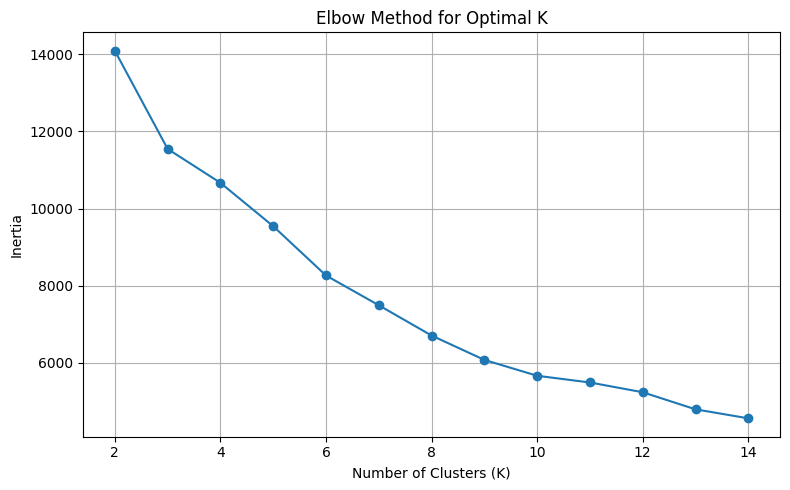

In [18]:
# Drop non-numeric columns (e.g. 'full_name') for clustering
X = features_df.drop(columns=["full_name"])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Elbow Method to find optimal K
inertias = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
##  U can plot Silhouette, Davies-Bouldin & Calinski

In [20]:
optimal_k = 8 # ← example, update based on elbow

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to original dataframe
features_df["cluster"] = clusters
features_df.head()

,full_name,total_spending,txn_count,avg_spend_3m,avg_spend_12m,spend_ratio,entertainment,food_dining,gas_transport,grocery_net,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,age,is_fraud,gender_F,gender_M,cluster
0,Aaron Murray,204477.60,2050,88.885874,99.932419,0.889460,13885.57,9679.22,5794.91,4189.51,...,6206.66,6924.73,16825.57,22255.29,50094.29,45.0,8,False,True,0
1,Aaron Pena,97973.69,1476,79.734418,67.709272,1.177600,5556.34,9035.06,9511.76,1750.75,...,4892.67,4886.22,5051.46,7312.30,6012.13,69.0,0,False,True,6
2,Aaron Rogers,38418.91,508,74.990513,80.570550,0.930743,1836.00,3294.84,4081.30,417.51,...,2299.22,2034.41,4503.95,2073.61,163.68,75.0,12,False,True,5
3,Aaron Stewart,28704.06,537,53.184725,58.375250,0.911083,2158.04,1172.88,3129.84,861.65,...,1918.84,943.16,3251.36,2315.20,93.91,25.0,8,False,True,5
4,Adam Keller,33310.58,521,76.425243,57.909540,1.319735,1198.12,1185.57,3504.95,345.12,...,471.82,1935.46,5686.04,2510.92,335.40,87.0,14,False,True,5


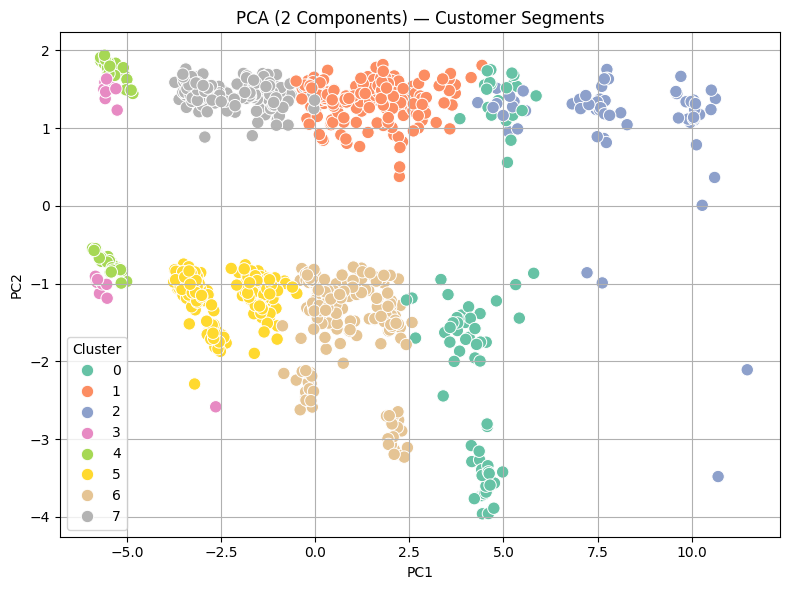

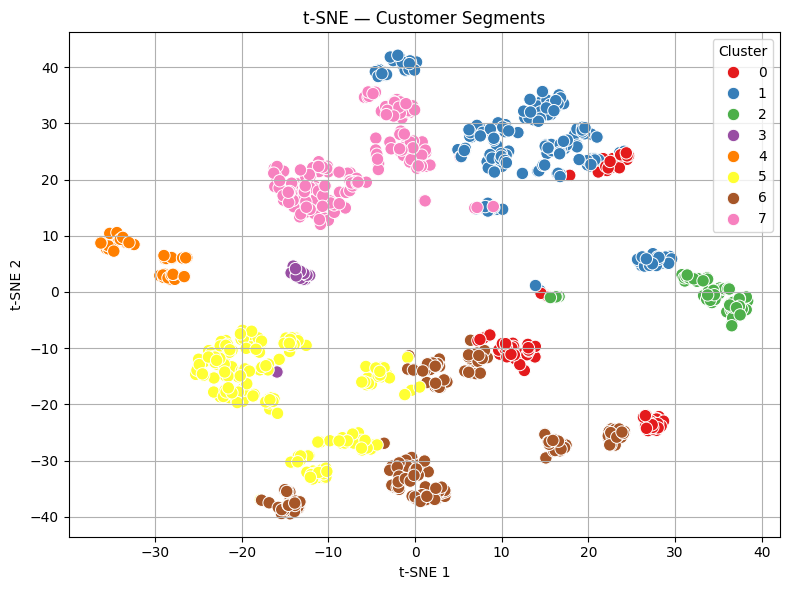

In [21]:
# 2D PCA for plotting
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_scaled)

# Plot PCA 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=features_df["cluster"], palette="Set2", s=80)
plt.title("PCA (2 Components) — Customer Segments")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# t-SNE for nonlinear structure
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=features_df["cluster"], palette="Set1", s=80)
plt.title("t-SNE — Customer Segments")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Assuming your clustered DataFrame is called `df` and has a column "cluster"
# Drop "full_name" if you only want numeric metrics
pd.set_option('display.max_columns', None)

cluster_summary = (
    features_df.drop(columns=["full_name","gender_M","gender_F"])  # optional: keep if you want to group on names
      .groupby("cluster")
      .agg(["median"])     # you can also add 'mean' here if desired
)

# Display cluster sizes separately
cluster_sizes = features_df["cluster"].value_counts().sort_index()

print("🔹 Cluster Sizes:")
print(cluster_sizes)

print("\n🔹 Cluster Median Metrics:")
display(cluster_summary)


🔹 Cluster Sizes:
cluster
0     80
1    197
2     63
3     18
4     55
5    203
6    176
7    181
Name: count, dtype: int64

🔹 Cluster Median Metrics:


,total_spending,txn_count,avg_spend_3m,avg_spend_12m,spend_ratio,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,age,is_fraud
,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median
cluster,,,,,,,,,,,,,,,,,,,,,
0,173117.645,2558.5,58.846606,60.949599,0.958592,11794.965,7734.720,18324.015,4904.835,23702.785,9994.28,15380.525,11047.985,7891.885,9259.040,6153.11,14668.585,19147.230,5431.560,35.0,9.0
1,118120.780,1558.0,64.225953,63.490208,0.981312,6864.320,5094.520,13390.020,2572.820,19986.400,5710.10,8902.370,8550.980,6685.140,5795.670,6397.91,9593.280,9767.070,1559.420,47.0,9.0
2,230041.750,2602.0,87.912500,88.580236,1.003074,17713.140,11154.720,6320.840,9632.950,50038.000,10099.83,15174.880,13431.840,13391.120,14047.280,11232.61,25375.750,32942.100,2124.920,36.0,6.0
3,5812.180,9.0,616.017083,604.797222,1.000000,0.000,0.000,0.000,0.000,727.095,0.00,0.000,0.000,791.095,0.000,0.00,2906.135,1074.800,0.000,71.5,9.0
4,6149.410,10.0,0.000000,327.302000,0.000000,0.000,0.000,9.860,0.000,819.180,0.00,0.000,0.000,1447.240,0.000,0.00,2822.580,957.090,0.000,59.0,10.0
5,50631.830,531.0,64.682706,68.713821,0.951410,3172.330,2746.320,4321.020,957.680,6647.170,2291.75,4194.200,3867.240,2560.800,2295.270,2048.99,4626.370,4233.620,677.630,53.0,8.0
6,105760.365,1543.5,63.577680,65.901799,0.977325,7007.650,5532.655,11456.275,2247.295,15017.495,6624.67,9484.505,7522.130,5402.620,4811.455,4808.85,9928.870,9012.815,4122.925,47.0,9.0
7,47986.520,537.0,63.607391,67.899480,0.976148,3087.990,2527.350,4736.110,885.220,8243.550,2012.72,3586.530,3807.750,2782.700,2687.100,2570.93,4293.730,4715.030,240.090,56.0,9.0


Cluster	🎯 Profile

0	🧳 Younger, ultra-active spenders — High transaction count (~2,500), strong across gas_transport, grocery_pos, and shopping. Age ~35, high spending, moderate fraud. Likely engaged, everyday power users.

1	👩‍💼 High-value, steady females — Slightly older (~47), good engagement, moderate fraud. Possibly experienced professionals or heads of household.

2	👑 Elite high-spending women — Top spenders across all channels, especially shopping_pos and entertainment. Young (~36), low fraud. These are your VIPs with strong cross-category value.

3	🧓 Outlier elders with burst spending — Tiny txn count but extremely high avg spend in last 3–12 months. Elderly (~71.5), likely anomalies or rare splurgers. May warrant exclusion or special attention.

4	💤 Dormant male seniors — Barely active users with little recent activity. Possibly legacy accounts or churned. Age ~59. High fraud count suggests possible test/fraudulent cases.

5	🧰 Mid-aged, moderate males — Modest overall spend but decent recency. Spread across essentials. Age ~53. Could represent middle-income, practical users. Fraud appears mild.

6	🎯 Mature, consistent professionals — Balanced transaction volume and steady spending in essentials like home, gas, shopping. ~47 years old, moderate fraud. Possibly frequent, organized shoppers.

7	👵 Older, low-to-mid spenders — Slightly older (~56), lower transaction volume. Spending spread across grocery, personal care, shopping. Not extreme in behavior. Possibly value-driven consumers.

In [23]:
### If want to identify outlier, can use DBSCAN, or even HDBSCAN is better as it is not that computationally extensive
### Then we can see if the clusters are spherically shaped or elliptically shaped, if spherically, we can use KMeans, MiniBatchKMeans
### If elliptical, we can use GMM
### If interlocking, we can use Spectral Clustering, based on the PCA plot, I think we should use GMM.

🧪 TL;DR Recommendation
Start with GMM — best next step from KMeans with only minor changes needed

Then try HDBSCAN if you want more flexibility, robustness to noise, or density-based interpretation

We can do time series forecasting as well, if there are not much outliers, simple ARIMA, SARIMAX, ARIMAX or SARIMAX model should be good enough.
If not XGBoost time series forecasting can be done. Prophet or LSTM too.

In [24]:
df.head(2)

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,merch_zipcode,merch_eff_time,merch_last_update_time,cc_bic,full_name,age
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 08:00:18+08:00,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,28705.0,2012-01-01 08:00:18.798532 +08:00,2012-01-01 08:00:18.666000 +08:00,CITIUS33CHI,Jennifer Banks,32
2019-01-01 08:00:44+08:00,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,NaN,2012-01-01 08:00:44.867960 +08:00,1974-03-15 07:30:04.479000 +08:00,ADMDUS41,Stephanie Gill,42


In [25]:
# Convert the datetime index to just date
df["trans_date"] = df.index.date

# Now group by the new date column and sum amount
daily_spend = df.groupby("trans_date")["amt"].sum().reset_index()
daily_spend.head(2)

,trans_date,amt
0,2019-01-01,101599.67
1,2019-01-02,100130.54


In [26]:
len(daily_spend)

538

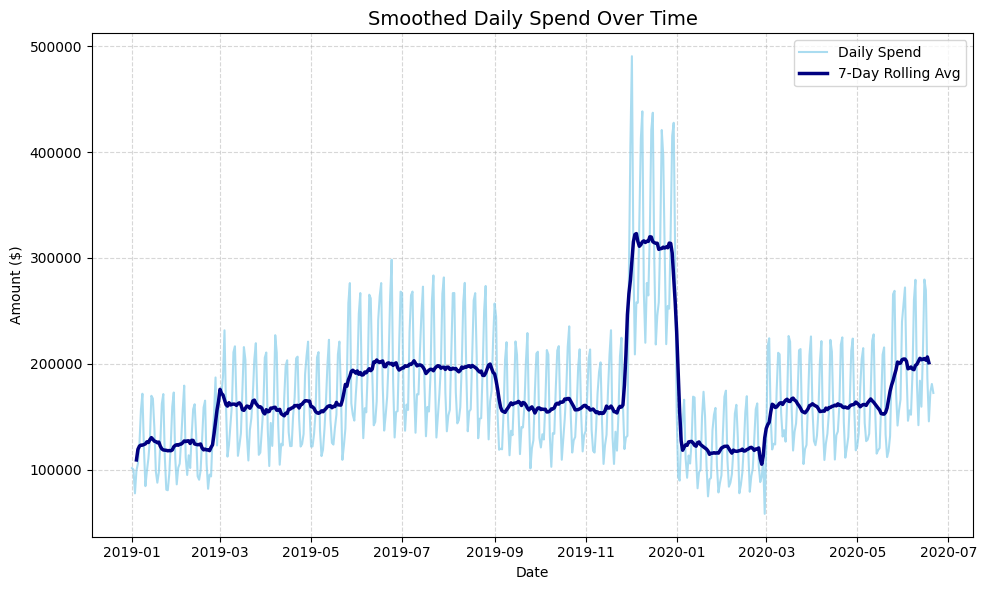

In [27]:
# Convert date column to datetime format
daily_spend["trans_date"] = pd.to_datetime(daily_spend["trans_date"])

# Sort by date in case it's unordered
daily_spend = daily_spend.sort_values("trans_date")

# Smooth with 7-day centered rolling average
daily_spend["amt_smooth"] = daily_spend["amt"].rolling(window=7, center=True).mean()

# Plot raw + smoothed spend
plt.figure(figsize=(10, 6))

plt.plot(daily_spend["trans_date"], daily_spend["amt"], label="Daily Spend", color="skyblue", alpha=0.7)
plt.plot(daily_spend["trans_date"], daily_spend["amt_smooth"], label="7-Day Rolling Avg", color="navy", linewidth=2.5)

plt.title("Smoothed Daily Spend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [28]:
daily_spend.head(5)

,trans_date,amt,amt_smooth
0,2019-01-01,101599.67,NaN
1,2019-01-02,100130.54,NaN
2,2019-01-03,77700.96,NaN
3,2019-01-04,99248.75,109275.871429
4,2019-01-05,105963.08,119302.205714
